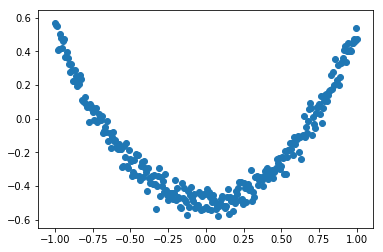

0.16990745


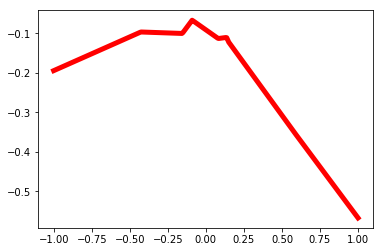

0.011990715


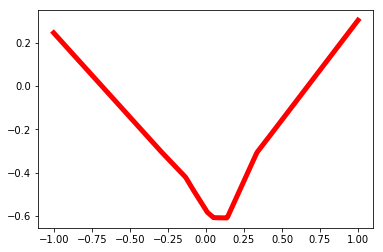

0.008257435


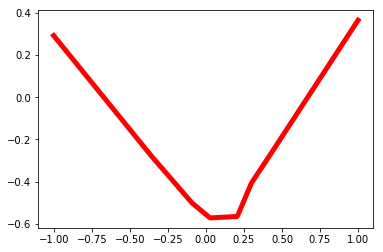

0.006179481


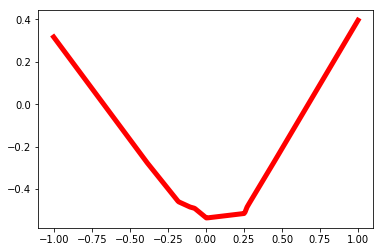

0.0051405374


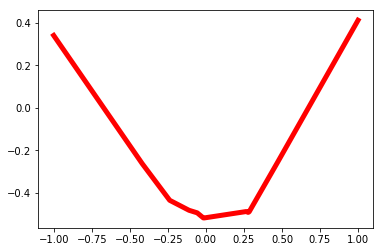

0.004541202


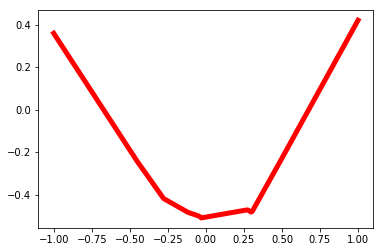

0.004148565


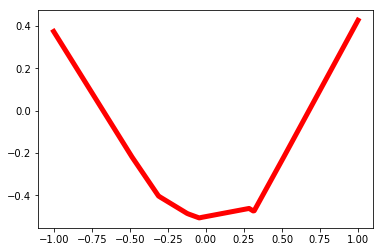

0.0038860163


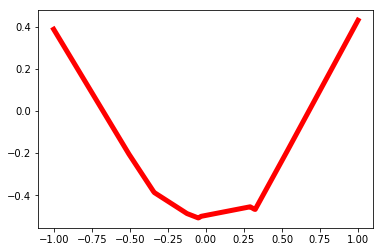

0.0037080753


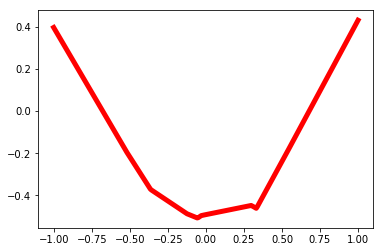

0.0035663866


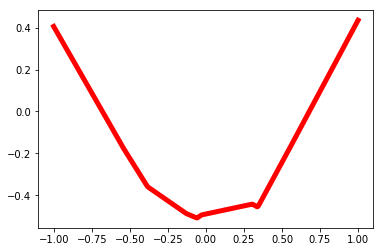

0.0034491415


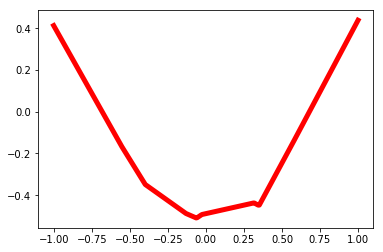

0.0033495696


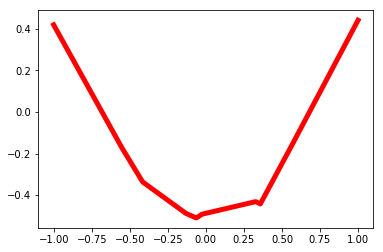

0.0032548916


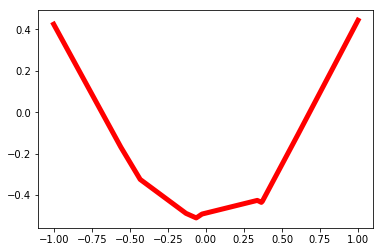

0.0031765783


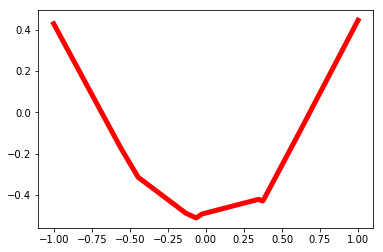

0.0031149737


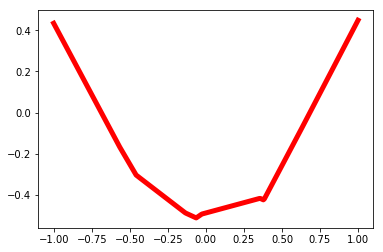

0.0030505909


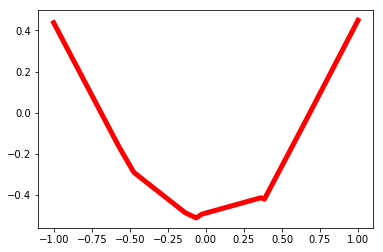

0.0029949448


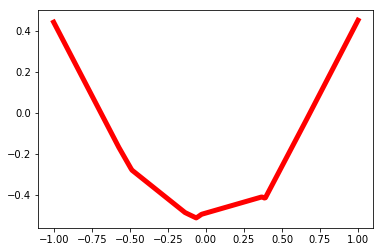

0.0029521603


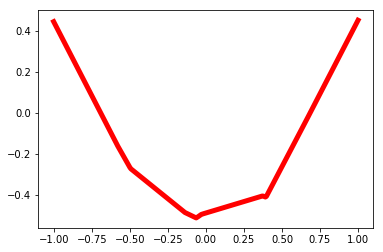

0.002912841


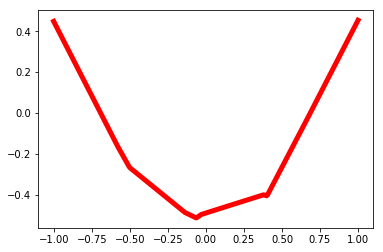

0.002870173


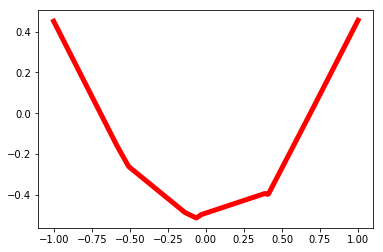

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def add_layer(inputs,in_size,out_size,activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

layer1 = add_layer(xs,1,10,activation_function = tf.nn.relu)
prediction = add_layer(layer1,10,1,activation_function = None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                   reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

fig =  plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
# plt.ion()
plt.show()
    

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = plt.plot(x_data,prediction_value,'r-',lw=5)        
        plt.pause(0.1)